In [32]:
#knnregression

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
data=pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [44]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [45]:
#feature scaling
X = data.drop('Chance of Admit', axis=1)
y= data['Chance of Admit']
print(X.shape)
print(y.shape)

(400, 8)
(400,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=2)
print(X_train.shape)
print(y_train.shape)
print('first 10 training time samples:')
print(X_train.head(10))

(320, 8)
(320,)
first 10 training time samples:
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
205         206        295           99                  2  2.5   3.0  7.65   
354         355        297           98                  2  2.5   3.0  7.67   
3             4        322          110                  3  3.5   2.5  8.67   
264         265        325          110                  2  3.0   2.5  8.76   
194         195        316          109                  3  3.5   3.0  8.76   
310         311        320          104                  3  3.0   3.5  8.74   
284         285        340          112                  4  5.0   4.5  9.66   
119         120        327          104                  5  3.0   3.5  8.84   
385         386        335          117                  5  5.0   5.0  9.82   
261         262        312          104                  3  3.5   4.0  8.09   

     Research  
205         0  
354         0  
3           1  
264         1  
19

In [48]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor(n_neighbors=7)
knn.fit(scaled_X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [50]:
ypre=knn.predict(scaled_X_test)

In [51]:
from sklearn.metrics import mean_squared_error,r2_score


In [52]:
mse = mean_squared_error(y_test,ypre)
rmse = np.sqrt(mse)
print('KNN Regression Metrics:')
print('mean squared error:',mse)#error b/w estimated and actual
print('Root Mean Squared Error:', rmse) 

KNN Regression Metrics:
mean squared error: 0.0033783928571428563
Root Mean Squared Error: 0.058123943922817695


In [53]:
r1 = r2_score(y_test,ypre)
print('R-squared:',r1)

R-squared: 0.8275767985119966


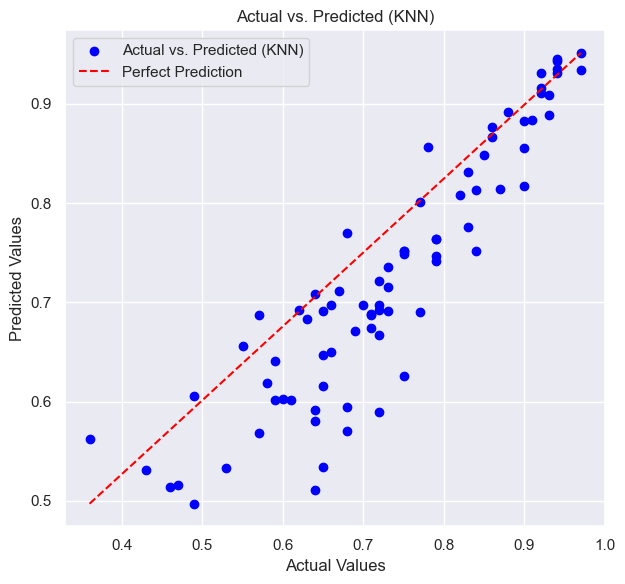

In [55]:

# Scatter plot for KNN Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, ypre, color='blue', label='Actual vs. Predicted (KNN)')
plt.plot([min(y_test), max(y_test)], [min(ypre), max(ypre)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
print("KNN Predictions:")
print(ypre[:10])  
print("True Values:")
print(y_test.head(10)) 

KNN Predictions:
[0.56285714 0.88428571 0.60142857 0.64714286 0.76428571 0.93571429
 0.68714286 0.89142857 0.69285714 0.68285714]
True Values:
94     0.36
32     0.91
225    0.61
157    0.65
356    0.79
25     0.94
67     0.57
189    0.88
304    0.62
226    0.63
Name: Chance of Admit, dtype: float64


In [47]:
#Random forest regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
data1=pd.read_csv('Admission_Predict.csv')
data1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

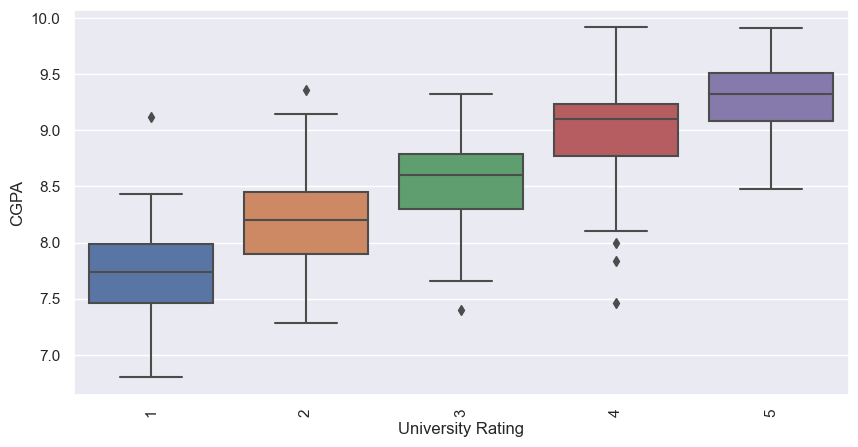

In [58]:
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.boxplot(x='University Rating',y='CGPA',data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [27]:
X=data1.iloc[:,[0,8]].values
print(X.shape)
print(X[:5])

(400, 2)
[[1.   0.92]
 [2.   0.76]
 [3.   0.72]
 [4.   0.8 ]
 [5.   0.65]]


In [28]:
data1[:5]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
y=data1.iloc[:,8].values
print(y.shape)

(400,)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
print('top 5 training input values- before preprocessing')
print(X_train[:5])
print(X_train.shape)

top 5 training input values- before preprocessing
[[ 94.     0.44]
 [ 24.     0.95]
 [300.     0.71]
 [ 14.     0.62]
 [ 91.     0.64]]
(320, 2)


In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
print('top 5 training input values-afer preprocessing:')
print(X_train[:5])

top 5 training input values-afer preprocessing:
[[-0.89670439 -2.04580679]
 [-1.50650366  1.60071645]
 [ 0.89784776 -0.11529448]
 [-1.59361784 -0.75879859]
 [-0.92283864 -0.61579767]]


In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, criterion='squared_error', random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test,y_pred)


In [35]:
print("Mean Squared Error:",mse)
print('Root Mean Squared Error:', rmse) 


Mean Squared Error: 7.349999999999998e-06
Root Mean Squared Error: 0.0027110883423451916


In [36]:
print("R-squared:",r2)

R-squared: 0.9996821956604575


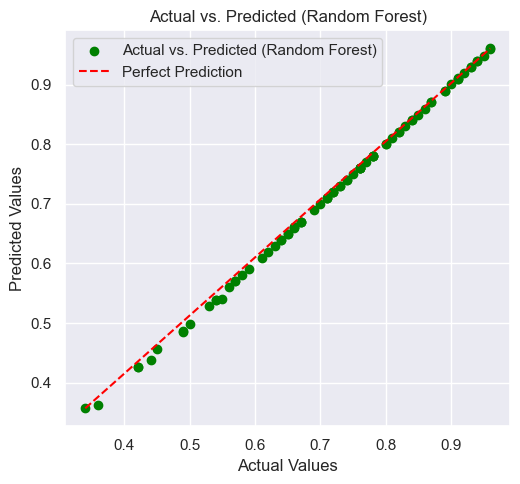

In [38]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', label='Actual vs. Predicted (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

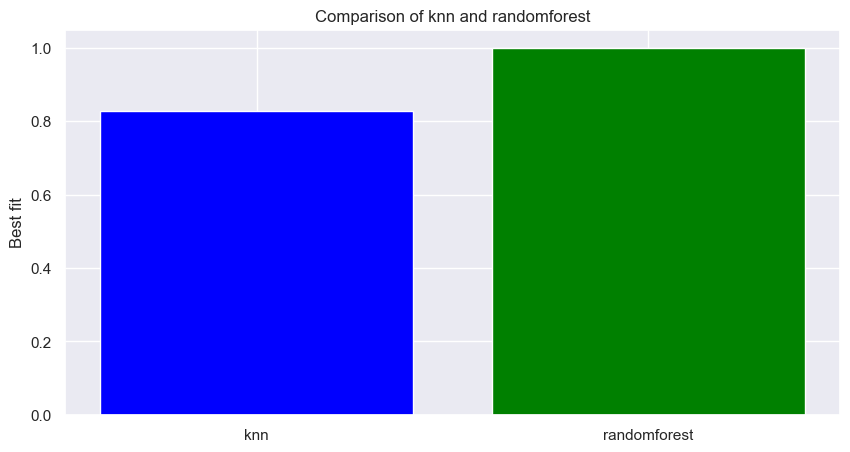

In [60]:
labels = ['knn','randomforest']
Bestfit = [r1,r2]
plt.bar(labels, Bestfit, color=['blue', 'green'])
plt.ylabel('Best fit')
plt.title('Comparison of knn and randomforest')
# Set the y-axis limit from 0 to 1 for accuracy values
plt.show()